In [346]:
# WARNING: This cell *must* be loaded for the rest of the notebook to work
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data source (Excel file)
data_source = "../data/raw/videojuegos.xlsx"

# Game Recommendation Engine: Analyzing a Video game Database

_Fancy name, huh?_
_Don't let it fool you, it's just a simple school project._


## Introduction

This is a project for an analytics-driven course called "Análisis de Biología Computacional."
My teacher, Drao. Ella Raquel Acuña Gonzáles gave us a file called `videojuegos.xlsx`.
This file contains a database of video games, with the following columns:

| Column name   | Description                                                 |
|---------------|-------------------------------------------------------------|
| Game          | Name of the game                                            |
| First Release | The date of its first release                               |
| Platform      | The platform that my teacher has to play the game           |
| Re-release    | The date of the last update of the game                     |
| Developer     | The company that developed the game                         |
| Publisher     | The company that published the game                         |
| Genre         | The genre of the game                                       |
| Subgenre      | The subgenre of the game                                    |
| Main story    | The time it takes to complete the main story                |
| Main + extras | The time it takes to complete the main story and the extras |
| Completionist | The time it takes to complete the game 100%                 |
| Hours Played  | The time my teacher has played the game                     |
| % Completion  | The percentage of the game my teacher has completed         |
| Metascore     | The score that critics gave to the game                     |
| User Score    | The score that users gave to the game                       |

Using this information and the file, the following analysis was created.

## Understanding the data

This first step is crucial to understand the data and the information it contains.
First, I will load the data into a pandas dataframe.
We can then use the `head()` function to see the first 5 rows of the dataframe.

In [347]:
df = pd.read_excel(data_source)
df.head()

,Game,Original,First Release,Platform,Re-release,Developer,Publisher,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score
0,Dragon's Lair,Arcade,1983-06-19 00:00:00,STEAM,1983-06-19 00:00:00,Advanced Microcomputer Systems,"Cinematronics, Taito",Adventure,Interactive Movie,1.0,2.0,3.0,5.9,100,41.0,60.0
1,Dragon Warrior I,NES,1986-05-27 00:00:00,Emulator,2000-09-27 00:00:00,Chunsoft,Nintendo,Role-Playing Game,JRPG,9.0,10.0,11.0,12.0,100,80.0,60.0
2,Dr. Mario: Miracle Cure,NES,1990-07-27 00:00:00,3DS,2015-05-31 00:00:00,Arika,Nintendo,Puzzle,Logic Game,3.0,3.0,5.5,19.9,100,69.0,69.0
3,The Legend of Zelda: Link's Awakening DX,GB,1993-06-06 00:00:00,3DS,1999-12-15 00:00:00,Nintendo,Nintendo,Action-Adventure,Action-Adventure,14.5,16.0,16.0,16.2,100,100.0,88.0
4,Day of the Tentacle Remastered,DOS,1993-06-25 00:00:00,STEAM,2016-03-22 00:00:00,Double Fine Productions,LucasArts,Adventure,Point-and-Click,5.0,5.5,6.0,4.3,100,86.0,79.0


We can also use the `info()` function to see the data types of each column and the number of entries.

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           743 non-null    object 
 1   Original       743 non-null    object 
 2   First Release  743 non-null    object 
 3   Platform       743 non-null    object 
 4   Re-release     743 non-null    object 
 5   Developer      743 non-null    object 
 6   Publisher      743 non-null    object 
 7   Genre          743 non-null    object 
 8   Subgenre       743 non-null    object 
 9   Main Story     738 non-null    float64
 10  Main + Extra   738 non-null    float64
 11  Completionist  738 non-null    float64
 12  Hours Played   735 non-null    float64
 13  % Completion   743 non-null    int64  
 14  Metascore      737 non-null    float64
 15  User Score     737 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 93.0+ KB


## Cleaning the data

The first thing I will do is clean the data.

### Check for null values

Checking for null values will allow me to reduce the number of rows in the dataframe.

In [349]:
df.isnull().sum()

Game             0
Original         0
First Release    0
Platform         0
Re-release       0
Developer        0
Publisher        0
Genre            0
Subgenre         0
Main Story       5
Main + Extra     5
Completionist    5
Hours Played     8
% Completion     0
Metascore        6
User Score       6
dtype: int64

There are a few Main Story values that are missing.
I want to see if any of these games are interesting or important for the analysis.

In [350]:
df[df["Main Story"].isnull()]

,Game,Original,First Release,Platform,Re-release,Developer,Publisher,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score
716,Screaming Chicken: Ultimate Showdown,Windows,2023-04-13 00:00:00,STEAM,2023-04-13 00:00:00,Chicken Studio,META Publishing,Idle,Party Game,NaN,NaN,NaN,0.0,0,NaN,NaN
730,Kindred Fates: Combat Arena Alpha,Windows,2021-05-03 00:00:00,STEAM,2021-05-03 00:00:00,Skymill Studios,Skymill Studios,Role-Playing Game,Monster Taming,NaN,NaN,NaN,0.0,-1,NaN,NaN
740,Forsaken Castle,Windows,Soon,STEAM,Soon,Duck Block Games,Duck Block Games,Action-Adventure,Metroidvania,NaN,NaN,NaN,0.0,-1,NaN,NaN
741,Hollow Knight: Silksong,Windows,Soon,STEAM,Soon,Team Cherry,Team Cherry,Action-Adventure,Metroidvania,NaN,NaN,NaN,0.0,-1,NaN,NaN
742,Ova Magica,Windows,Soon,STEAM,Soon,ClaudiaTheDev,Top Hat Studios,Simulation,Monster Taming,NaN,NaN,NaN,0.0,-1,NaN,NaN


It looks like all of these games are either not released or have too little information.
I will remove these rows from the dataframe.

In [351]:
df = df.dropna(subset=["Main Story"])

In [352]:
df.isnull().sum()

Game             0
Original         0
First Release    0
Platform         0
Re-release       0
Developer        0
Publisher        0
Genre            0
Subgenre         0
Main Story       0
Main + Extra     0
Completionist    0
Hours Played     8
% Completion     0
Metascore        1
User Score       1
dtype: int64

Now the dataframe is clean of null values.

### Check for duplicates

Checking for duplicates will also allow for a cleaner dataframe.

In [353]:
df.duplicated().sum()

0

There are no duplicates in the dataframe, so we can move on.

### Cleanup ruleset

After doing the standard cleanup, I will apply a few rules to the dataframe.

1. The `Hours Played` column will be used as a variable that defines how much my teacher likes a certain game. This will be key because if they have played a game for a long time, it means they like it but shouldn't be recommended again.
2. The `Original` column will be discarded because it is not useful for the analysis. We have no way to know how much time my teacher played in the Original console, therefore, it is useless.
3. The columns `Developer`and `Publisher` will be discarded since they can produce a bias in the analysis. If my teacher likes a game from a certain developer, it doesn't mean they will like another game from the same developer and vice versa.
4. The rows that contain a 100 in `% Completion`will be discarded. This is because the games that have a 100% completion are games that my teacher has already completed and therefore, shouldn't be recommended again.
5. The column `First Release` will be discarded since it; we cannot know how much time my teacher played the game in the original release.
6. A new column `Score Average` will be created. This column will be the average of the `Metascore` and `User Score` columns.
7. I will order the dataframe by the `Hours Played` column in descending order.

During future steps of the analysis, these rules might also apply:
1. Games that have a high `Hours Played` will have less possibility of being recommended, and most likely will be discarded.
2. Games that have a low `Score Average` will have less possibility of being recommended, and most likely will be discarded.

Additionally, my teacher asked for us to give her a game to play, but she did not mention if she wanted a game that she has already played or not. For the purpose of keeping her repository of games fresh, I will be inclined to recommend games that she has not played yet or that she has played very little.

In [354]:
df = df.drop(columns=["Original", "Developer", "Publisher", "First Release"])
df = df[df["% Completion"] != 100]
df["Score Average"] = (df["Metascore"] + df["User Score"]) / 2
df = df.sort_values(by=["Hours Played"], ascending=False)

df.head()

,Game,Platform,Re-release,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score,Score Average
47,Pokémon Rouge,3DS,1999-10-08 00:00:00,Role-Playing Game,Monster Taming,26.5,43.5,102.0,266.4,99,100.0,89.0,94.5
55,Pokémon Rumble World,3DS,2015-04-08 00:00:00,Role-Playing Game,Action RPG,23.0,46.5,115.0,218.2,95,58.0,61.0,59.5
84,Pokémon Omega Ruby,3DS,2014-11-21 00:00:00,Role-Playing Game,Monster Taming,25.5,52.0,161.0,203.2,57,83.0,75.0,79.0
76,Pokémon Sun,3DS,2016-11-18 00:00:00,Role-Playing Game,Monster Taming,33.0,59.0,139.0,166.1,68,87.0,76.0,81.5
94,Pokémon Platinum,3DS,2008-09-13 00:00:00,Role-Playing Game,Monster Taming,35.0,68.5,235.0,105.8,44,83.0,89.0,86.0


## Exploratory Data Analysis

The first relationship I want to explore is the time spent playing each genre.
This will most likely help determine which genre my teacher likes the most and thus, which genre to recommend.

<Axes: xlabel='Genre'>

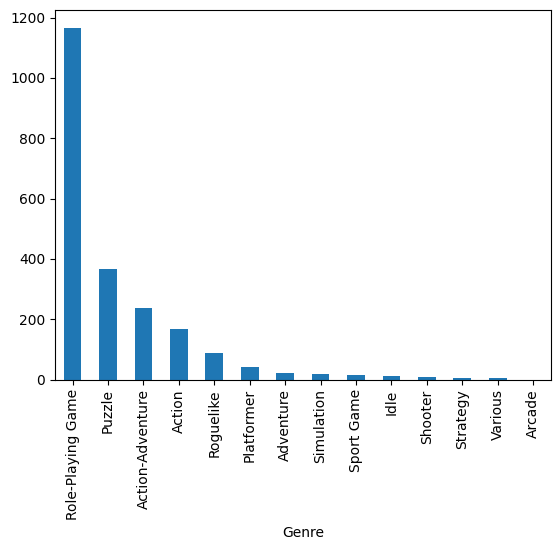

In [355]:
df.groupby("Genre")["Hours Played"].sum().sort_values(ascending=False).plot.bar()

We can observe here that the genre that my teacher has played the most is Role-Playing Game.
I will now create a new dataframe that contains only the Role-Playing Games.

In [356]:
rpg_df = df[df["Genre"] == "Role-Playing Game"].sort_values(by=["Hours Played"], ascending=False)

Creating a visualization between the hours played of each game and the completion percentage will help us determine if there is a correlation between the two.

For this next step, I will also implement a tendency line to help visualize the correlation.

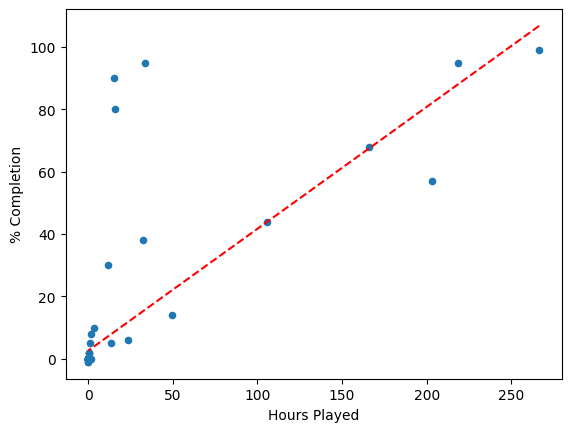

In [357]:
x = rpg_df["Hours Played"]
y = rpg_df["% Completion"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

rpg_df.plot.scatter(x="Hours Played", y="% Completion")
plt.plot(x, p(x), "r--")

There seems to be a linear correlation between the two variables.
This means that the more hours my teacher plays a game, the more likely she is to complete it.

This also means that all the games that she has little to no play time should be our priority.
I will remove all the games that have more than 100 hours played or more than 50% completion.

In [358]:
rpg_df = rpg_df[(rpg_df["Hours Played"] < 100)]
rpg_df = rpg_df[(rpg_df["% Completion"] < 50)]

Exploring the relation between the time played and the score average will help us determine if there is a correlation between the two.

<Axes: xlabel='Hours Played', ylabel='Score Average'>

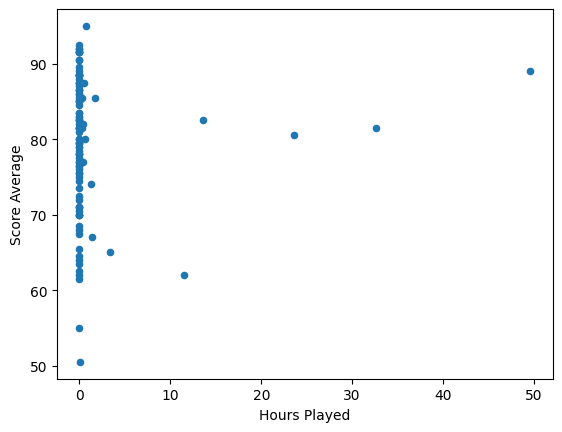

In [359]:
rpg_df.plot.scatter(x="Hours Played", y="Score Average")

It looks like there is a very vague correlation between the two variables.
The average of score seems to be higher than 50, but there are a ton of games that my teacher has played for less than 10 hours, so this relation is not significant.

Finally, I want to see the relation between the Role-Playing Games and the subgenres.
For this, I will make a graph that shows the number of hours played for each subgenre, inside the Role-Playing Games genre.

<Axes: xlabel='Subgenre'>

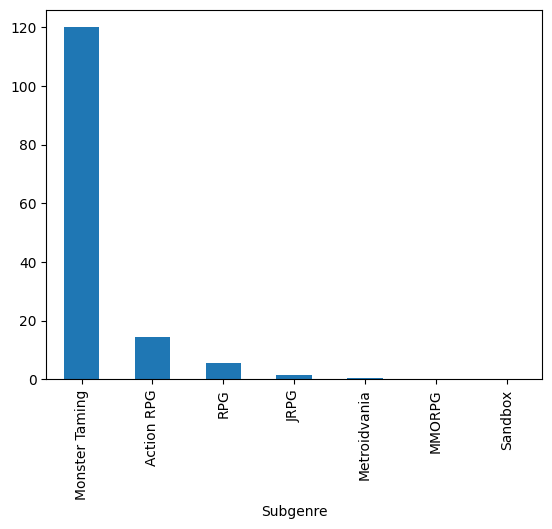

In [360]:
rpg_df.groupby("Subgenre")["Hours Played"].sum().sort_values(ascending=False).plot.bar()

The subgenre inside the Role-Playing Games genre that my teacher has played the most is Monster Taming. Let's see which games are in this subgenre.

In [361]:
rpg_df = rpg_df[rpg_df["Subgenre"] == "Monster Taming"].sort_values(by=["Hours Played"], ascending=False)
rpg_df.head(len(rpg_df))

,Game,Platform,Re-release,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score,Score Average
124,Pokémon HeartGold,3DS,2009-09-12 00:00:00,Role-Playing Game,Monster Taming,37.0,72.5,214.0,49.6,14,87.0,91.0,89.0
100,Pokémon Y,3DS,2013-10-12 00:00:00,Role-Playing Game,Monster Taming,31.5,71.0,205.0,32.6,38,88.0,75.0,81.5
151,Pokémon Ultra Sun,3DS,2017-11-17 00:00:00,Role-Playing Game,Monster Taming,33.5,56.5,122.0,23.6,6,84.0,77.0,80.5
153,Pokémon White,3DS,2010-09-18 00:00:00,Role-Playing Game,Monster Taming,32.5,62.0,160.0,13.6,5,87.0,78.0,82.5
499,Pokémon White 2,3DS,2012-06-23 00:00:00,Role-Playing Game,Monster Taming,34.5,64.0,191.0,0.6,0,80.0,80.0,80.0
375,Pokémon FireRed,GBA,2004-09-09 00:00:00,Role-Playing Game,Monster Taming,29.5,51.0,148.0,0.0,0,81.0,86.0,83.5
382,Pokémon Emerald,GBA,2005-05-01 00:00:00,Role-Playing Game,Monster Taming,30.5,65.5,201.0,0.0,0,76.0,89.0,82.5
711,Rainbow Billy: The Curse of the Leviathan,STEAM,2021-10-05 00:00:00,Role-Playing Game,Monster Taming,11.0,16.0,21.5,0.0,0,81.0,68.0,74.5
643,Monster Hunter: World,STEAM,2018-08-09 00:00:00,Role-Playing Game,Monster Taming,48.0,108.0,402.0,0.0,0,88.0,68.0,78.0
608,World of Final Fantasy,STEAM,2017-11-21 00:00:00,Role-Playing Game,Monster Taming,35.5,47.0,83.0,0.0,0,77.0,77.0,77.0


Looking at the current dataframe, I can see that there are multiple games with 0 hours played.
These games are the ones that I am looking for, since they are the ones that my teacher has not played yet.

I will now create a new dataframe that contains only the games that my teacher has not played yet.

In [362]:
rpg_0_df = rpg_df[rpg_df["Hours Played"] == 0]

rpg_0_df.head(len(rpg_0_df))

,Game,Platform,Re-release,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score,Score Average
375,Pokémon FireRed,GBA,2004-09-09 00:00:00,Role-Playing Game,Monster Taming,29.5,51.0,148.0,0.0,0,81.0,86.0,83.5
382,Pokémon Emerald,GBA,2005-05-01 00:00:00,Role-Playing Game,Monster Taming,30.5,65.5,201.0,0.0,0,76.0,89.0,82.5
711,Rainbow Billy: The Curse of the Leviathan,STEAM,2021-10-05 00:00:00,Role-Playing Game,Monster Taming,11.0,16.0,21.5,0.0,0,81.0,68.0,74.5
643,Monster Hunter: World,STEAM,2018-08-09 00:00:00,Role-Playing Game,Monster Taming,48.0,108.0,402.0,0.0,0,88.0,68.0,78.0
608,World of Final Fantasy,STEAM,2017-11-21 00:00:00,Role-Playing Game,Monster Taming,35.5,47.0,83.0,0.0,0,77.0,77.0,77.0
715,Coromon,STEAM,2022-03-31 00:00:00,Role-Playing Game,Monster Taming,24.0,34.0,49.0,0.0,0,73.0,78.0,75.5
717,Cassette Beasts,STEAM,2023-04-26 00:00:00,Role-Playing Game,Monster Taming,17.5,24.0,24.0,0.0,0,83.0,80.0,81.5
696,Nexomon: Extinction,STEAM,2020-08-28 00:00:00,Role-Playing Game,Monster Taming,25.5,34.5,63.0,0.0,0,71.0,82.0,76.5


We can see here in the `Platform`column there are only 2 consoles: `STEAM`and `GBA`.
Before choosing a game, I want to see how likely it is that my teacher will play a game in each console.

For this, I will compare the hours played in each of these 2 consoles on the original dataframe.

<Axes: xlabel='Platform'>

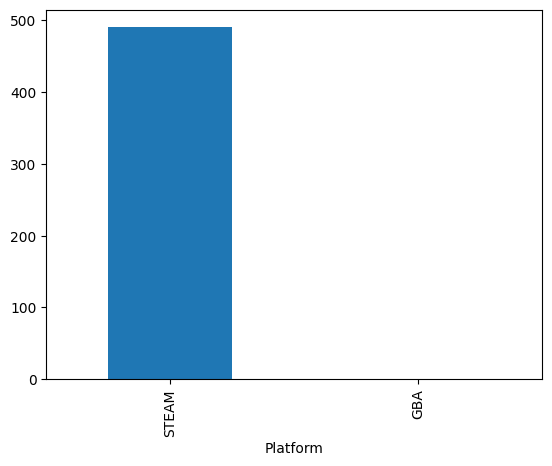

In [363]:
steam_gba_df = df[(df["Platform"] == "STEAM") | (df["Platform"] == "GBA")]
steam_gba_df.groupby("Platform")["Hours Played"].sum().sort_values(ascending=False).plot.bar()

It looks like my teacher has played a lot more games on the `STEAM` console than on the `GBA` console. This means she is more likely to play a game on the `STEAM` console.

Let's remove the `GBA` console from the `rpg_0_df` dataframe. Also, now I want to order the games by the `Score Average` column in descending order.

In [364]:
rpg_0_df = rpg_0_df[rpg_0_df["Platform"] == "STEAM"]
rpg_0_df = rpg_0_df.sort_values(by=["Score Average"], ascending=False)

Finally, we can check the first game in the dataframe and recommend it to my teacher.

In [365]:
rpg_0_df.head(1)

,Game,Platform,Re-release,Genre,Subgenre,Main Story,Main + Extra,Completionist,Hours Played,% Completion,Metascore,User Score,Score Average
717,Cassette Beasts,STEAM,2023-04-26 00:00:00,Role-Playing Game,Monster Taming,17.5,24.0,24.0,0.0,0,83.0,80.0,81.5


# Recommendation

The recommendation that will be given to my teacher is the game `Cassette Beasts`.

This game has the following characteristics:

| Characteristic                | Value               |
|-------------------------------|---------------------|
| Name                          | Cassette Beasts     |
| Platform                      | STEAM               |
| Latest version                | 2023-04-26 00:00:00 |
| Genre                         | Role-Playing Game   |
| Subgenre                      | Monster Taming      |
| Main Story time               | 17.5 hours          |
| Main + Extra time             | 24 hours            |
| Completionist time            | 24 hours            |
| Time played                   | 0 hours             |
| Current completion percentage | 0%                  |
| Metascore                     | 83.0                |
| User score                    | 80.0                |
| Score average                 | 81.5                |

This game has a good score average, and it is a game that my teacher has not played yet.
It's also within the genre, subgenre and platform that my teacher has played the most.